# 示例一 在约会网站上使用k-近邻算法 

## 背景介绍
>海伦使用在线约会网站寻找适合自己的约会对象约会网站会推荐不同的人选，但她没有从中找到喜欢的人。经过一番总结，她发现曾交往过三种类型的人：
     > + 不喜欢的人
     > + 魅力一般的人
     > + 极具魅力的人


## 一般流程
> 1. 收集数据：提供文本文件。
> 2. 准备数据：使用Python解析文本文件。
> 3. 分析数据：使用Matplotlib画二维扩散图。
> 4. 训练算法：此步骤不适用于k-近邻算法。
> 5. 测试算法：使用海伦提供的部分数据作为测试样本。测试样本和非测试样本的区别在于：测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记为一个错误。
> 6. 使用算法：产生简单的命令行程序，然后海伦可以输入一些特征数据以判断对方是否为自己喜欢的类型。

## 1. 收集数据
> 海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件datingTestSet.txt中，每个样本数据占据一行，总共有1000行。海伦的样本主要包含以下3种特征：
> + 每年获得的飞行常客里程数
> + 玩视频游戏所耗时间百分比
> + 每周消费的冰淇淋公升数

In [30]:
# 引入所需包
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import collections

## 2. 准备数据
> 将上述特征数据进行预处理,格式附和输入要求,输出训练样本矩阵以及类标签向量.

In [24]:
def file2matrix(filepath):
    fr = open(filepath)
    arrayOfLines = fr.readlines()
    numberOfLines = len(arrayOfLines)
    # 要返回的特征矩阵
    returnMat = np.zeros((numberOfLines, 3))
    # 要返回的标签向量
    classLabelVectoer = []

    # 将数据进行拆分处理
    index = 0
    for line in arrayOfLines:
        # 删除空白符('\n','\r','\t',' ')
        line = line.strip()
        listFromline = line.split('\t')
        returnMat[index, :] = listFromline[0:3]
        if listFromline[-1] == 'didntLike':
            classLabelVectoer.append(1)
        elif listFromline[-1] == 'smallDoses':
            classLabelVectoer.append(2)
        elif listFromline[-1] == 'largeDoses':
            classLabelVectoer.append(3)
        index += 1
    return returnMat, classLabelVectoer

## 2. 准备数据
> 因为数据样本之间的距离由所有特征决定，所以对象x和y之间如果有一个特征数值差别特别大，则在样本距离上起决定性作用，因此需要对数据进行<u>`归一化处理`</u>
> 处理方式为：
> $$ 
newValue = (oldValue-minValue)  \div  (maxValue-minValue) 
$$

In [25]:
def autoNum(dataSet):
    minValues = dataSet.min(0)
    maxValues = dataSet.max(0)
    ranges = maxValues - minValues
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minValues, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minValues

## 3. 分析数据
> 利用Matplotlib对数据进行可视化，创建散点图

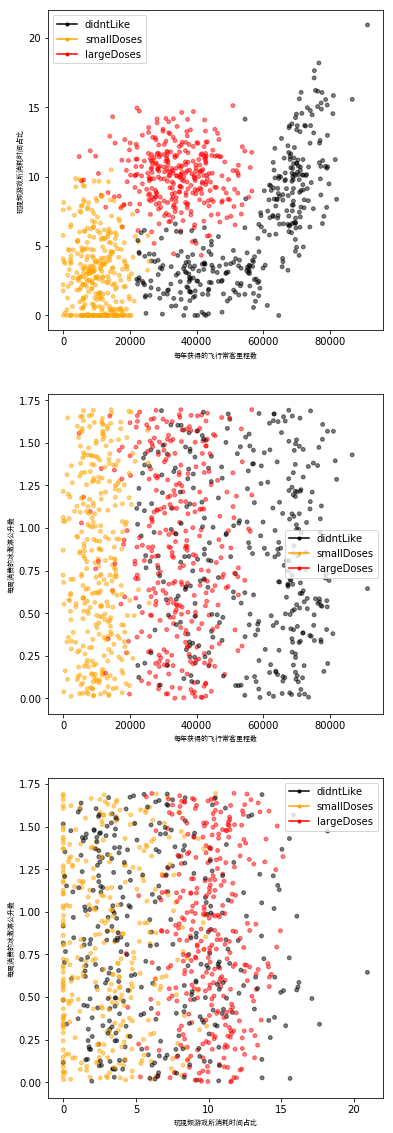

In [26]:
filepath = './data/datingTestSet.txt'
font = FontProperties(u'SimHei', size=15)
datingDataMat, datingLabels = file2matrix(filepath)
fig, axs = plt.subplots(nrows=3, figsize=(6,20))
numberOfLabels = len(datingLabels)
LabelsColors = []
for i in datingLabels:
    if i == 1:
        LabelsColors.append('black')
    if i == 2:
        LabelsColors.append('orange')
    if i == 3:
        LabelsColors.append('red')
# 画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
axs[0].scatter(x=datingDataMat[:, 0], y=datingDataMat[:, 1], color=LabelsColors, s=15, alpha=.5)
# 设置标题,x轴label,y轴label
axs0_xlabel_text = axs[0].set_xlabel(u'每年获得的飞行常客里程数', FontProperties=font)
axs0_ylabel_text = axs[0].set_ylabel(u'玩视频游戏所消耗时间占比', FontProperties=font)
plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')
plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')

# 画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
axs[1].scatter(x=datingDataMat[:, 0], y=datingDataMat[:, 2], color=LabelsColors, s=15, alpha=.5)
# 设置标题,x轴label,y轴label
axs1_xlabel_text = axs[1].set_xlabel(u'每年获得的飞行常客里程数', FontProperties=font)
axs1_ylabel_text = axs[1].set_ylabel(u'每周消费的冰激淋公升数', FontProperties=font)
plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')
plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

# 画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
axs[2].scatter(x=datingDataMat[:, 1], y=datingDataMat[:, 2], color=LabelsColors, s=15, alpha=.5)
# 设置标题,x轴label,y轴label
axs2_xlabel_text = axs[2].set_xlabel(u'玩视频游戏所消耗时间占比', FontProperties=font)
axs2_ylabel_text = axs[2].set_ylabel(u'每周消费的冰激淋公升数', FontProperties=font)
plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')
plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
# 设置图例
didntLike = mlines.Line2D([], [], color='black', marker='.', markersize=6, label='didntLike')
smallDoses = mlines.Line2D([], [], color='orange', marker='.', markersize=6, label='smallDoses')
largeDoses = mlines.Line2D([], [], color='red', marker='.', markersize=6, label='largeDoses')
# 添加图例
axs[0].legend(handles=[didntLike, smallDoses, largeDoses])
axs[1].legend(handles=[didntLike, smallDoses, largeDoses])
axs[2].legend(handles=[didntLike, smallDoses, largeDoses])
# 显示图片
plt.show()


## 4. 训练算法：此步骤不适用于k-近邻算法
> 利用上一文件中的分类器算法

In [32]:
def classify0(inx, dataset, labels, k):
    # 计算距离
    dist = np.sum((inx - dataset) ** 2, axis=1) ** 0.5
    # k个最近的标签
    k_labels = [labels[index] for index in dist.argsort()[0: k]]
    # 出现次数最多的标签即为最终类别
    label = collections.Counter(k_labels).most_common(1)[0][0]
    return label

## 5. 测试算法
> + 使用已有数据的90%作为训练样本来训练分类器，而使用其余的10%数据去测试分类器，检测分类器的正确率，需要注意的是，10%的测试数据应该
是随机选择的。
> + 对于分类器来说，错误率就是分类器给出错误结果的次数除以测试数据的总数，完美分类器的错误率为0，而错误率为1.0的分类器不会给出任何正确的分类结果。

In [34]:
def datingClassTest():
    # 定义初始信息k、测试集比例、错误率
    k = 3
    hoRatio = 0.10
    errorCount = 0.0

    # 数据的读取以及初始化
    datingDataMat, datingLabels = file2matrix('./data/datingTestSet.txt')
    norMat, ranges, minValues = autoNum(datingDataMat)
    m = norMat.shape[0]
    numTestvecs = int(m * hoRatio)

    # 测试数据进行测试
    for i in range(numTestvecs):
        labelResult = classify0(norMat[i, :], norMat[numTestvecs:m, :], datingLabels[numTestvecs:m], k)
        print('the classifier came back with : ', labelResult, ',the real label is : ', datingLabels[i])
        if labelResult != datingLabels[i]:
            errorCount += 1.0
    print('the total error count is :', errorCount, 'the total error rate is :', errorCount / float(numTestvecs))

datingClassTest()

the classifier came back with :  3 ,the real label is :  3
the classifier came back with :  2 ,the real label is :  2
the classifier came back with :  1 ,the real label is :  1
the classifier came back with :  1 ,the real label is :  1
the classifier came back with :  1 ,the real label is :  1
the classifier came back with :  1 ,the real label is :  1
the classifier came back with :  3 ,the real label is :  3
the classifier came back with :  3 ,the real label is :  3
the classifier came back with :  1 ,the real label is :  1
the classifier came back with :  3 ,the real label is :  3
the classifier came back with :  1 ,the real label is :  1
the classifier came back with :  1 ,the real label is :  1
the classifier came back with :  2 ,the real label is :  2
the classifier came back with :  1 ,the real label is :  1
the classifier came back with :  1 ,the real label is :  1
the classifier came back with :  1 ,the real label is :  1
the classifier came back with :  1 ,the real label is : 

在上述代码中，只进行一遍测试并不能完全说明分类器的准确性，因此需要随机使用数据进行多次验证，较为常见的就是`十折交叉验证`

## 6. 使用算法
> 将测试数据改为输入，在此不再给出相应代码以及运行结果。